## Project Title: Pneumonia Detection from Chest X-Rays Using Deep Learning

Objective: The goal of this project is to develop a robust deep learning model capable of accurately classifying chest X-ray images as either "NORMAL" or "PNEUMONIA". Students will employ Convolutional Neural Networks (CNNs) to automatically detect pneumonia from medical imaging data. This project aims to demonstrate the practical application of image classification techniques in medical diagnostics, improve understanding of CNN architectures, and assess model performance through various evaluation metrics. Additionally, students will gain experience in data preprocessing, model training, and performance evaluation, with the potential for deploying the model in a user-friendly application.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?resource=download")


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:16<00:00, 151MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import glob
import cv2
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, InputLayer
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# NOrmal Images : 1341


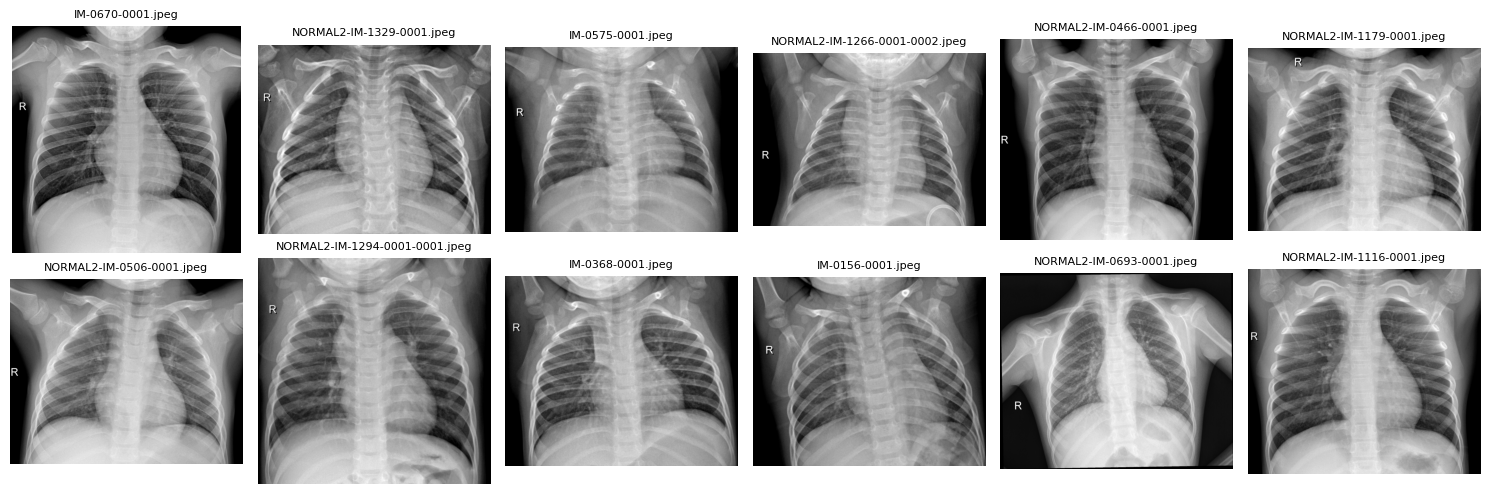

In [5]:
import os
import matplotlib.pyplot as plt

normal_folder_path = '/content/chest-xray-pneumonia/chest_xray/train/NORMAL'
images_name = os.listdir(normal_folder_path)
print(f'# NOrmal Images : {len(images_name)}')

fig, ax = plt.subplots(2, 6, figsize=(15, 5))
ax = ax.flatten()

for i in range(12):
    img_path = os.path.join(normal_folder_path, images_name[i])
    img = Image.open(img_path)
    ax[i].imshow(img , cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(images_name[i], fontsize=8)

plt.tight_layout()
plt.show()

# PNEUMONIA Images : 3875


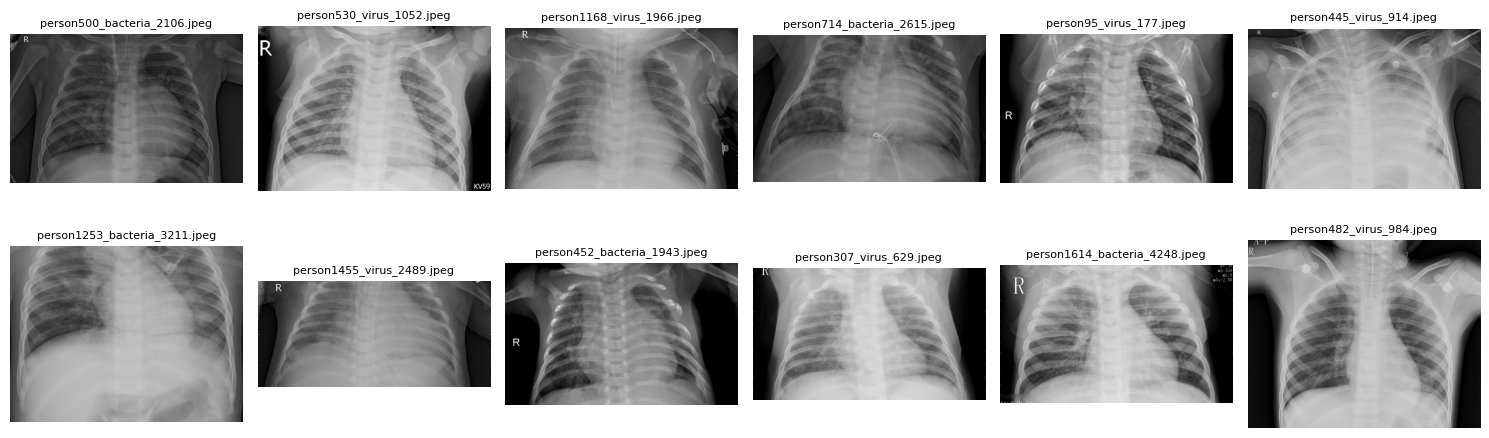

In [6]:
pne_folder_path = '/content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'
images_name = os.listdir(pne_folder_path)
print(f'# PNEUMONIA Images : {len(images_name)}')


fig, ax = plt.subplots(2, 6, figsize=(15, 5))
ax = ax.flatten()

for i in range(12):
    img_path = os.path.join(pne_folder_path, images_name[i])
    img = Image.open(img_path)
    ax[i].imshow(img , cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(images_name[i], fontsize=8)

plt.tight_layout()
plt.show()

In [7]:
train_path = '/content/chest-xray-pneumonia/chest_xray/train'
val_path = '/content/chest-xray-pneumonia/chest_xray/val'
test_path = '/content/chest-xray-pneumonia/chest_xray/test'

In [8]:
def get_images(path):
    X = []
    y = []
    for file in os.listdir(path):
        images = glob.glob(path + f'/{file}' + '/*')
        for image in images:
            image_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
            image_array = cv2.resize(image_array, (150, 150))
            image_array = np.expand_dims(image_array, axis = -1)
            X.append(image_array)
            y.append(1 if file != 'NORMAL' else 0)
    return X, y

In [9]:
X_train, y_train = get_images(train_path)
X_val, y_val = get_images(val_path)
X_test, y_test = get_images(test_path)

In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

<BarContainer object of 2 artists>

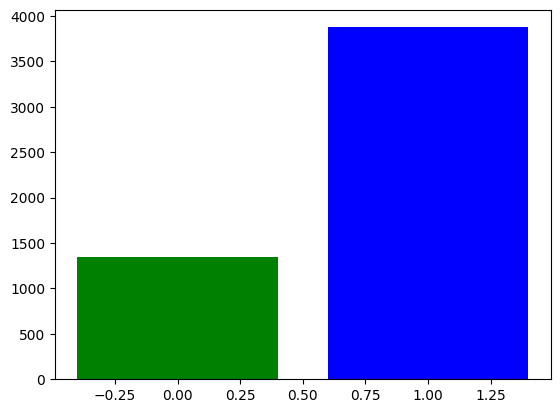

In [11]:
counts = Counter(y_train)
plt.bar(x = counts.keys(), height = counts.values(), color = ['b', 'g'])

Model without handle balance¶

In [12]:
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

In [13]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [14]:
data_gen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

data_gen.fit(X_train)

In [15]:
import tensorflow
tensorflow.keras.backend.clear_session()

In [17]:
model_1 = Sequential()
model_1.add( Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 1)))
model_1.add( Conv2D(64, (3, 3), activation='relu'))
model_1.add( MaxPooling2D((2, 2)))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( MaxPooling2D((2, 2)))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( MaxPooling2D((2, 2)))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( Conv2D(128, (3, 3), activation='relu'))
model_1.add( MaxPooling2D((2, 2)))
model_1.add( Flatten())
model_1.add( Dense(512, activation='relu'))
model_1.add( Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 69, 69, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,470,017 (9.42 MB)

 Trainable params: 2,470,017 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model_1.fit(data_gen.flow(X_train,y_train,batch_size = 32)
                      ,epochs=2,
                      validation_data =(X_val, y_val))

Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1513s 9s/step - acc: 0.7415 - loss: 0.5927 - val_acc: 0.5000 - val_loss: 0.7857
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1513s 9s/step - acc: 0.7339 - loss: 0.5824 - val_acc: 0.5000 - val_loss: 0.7987


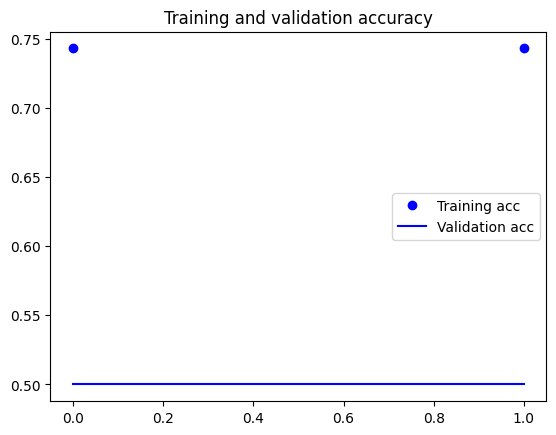

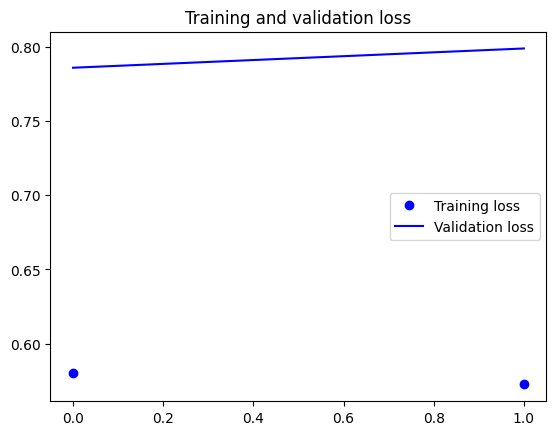

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
y_pred = model_1.predict(X_test)
y_pred = np.array([1 if prob > 0.5 else 0 for prob in y_pred])

20/20 ━━━━━━━━━━━━━━━━━━━━ 61s 3s/step


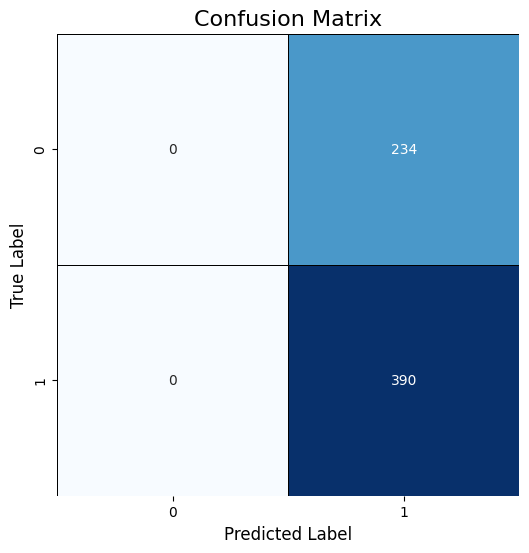

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', square=True)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show();

print(classification_report(y_test, y_pred))

Lets Handle Imbalance Data Using Class Weights

In [23]:
from sklearn.utils import compute_class_weight
class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)))
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [25]:
model_2 = Sequential()
model_2.add( Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 1)))
model_2.add( Conv2D(64, (3, 3), activation='relu'))
model_2.add( MaxPooling2D((2, 2)))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( MaxPooling2D((2, 2)))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( MaxPooling2D((2, 2)))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( Conv2D(128, (3, 3), activation='relu'))
model_2.add( MaxPooling2D((2, 2)))
model_2.add( Flatten())
model_2.add( Dense(512, activation='relu'))
model_2.add( Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 69, 69, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,470,017 (9.42 MB)

 Trainable params: 2,470,017 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
tensorflow.keras.backend.clear_session()
earlystopping = EarlyStopping(monitor='val_accuracy', patience = 3 , mode = 'max')

history2 = model_2.fit(data_gen.flow(X_train, y_train, batch_size=32),
                       epochs = 2,
                       validation_data=(X_val, y_val),
                       callbacks=[earlystopping],
                       class_weight = class_weights
                  )

Epoch 1/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1520s 9s/step - acc: 0.4675 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 1558s 10s/step - acc: 0.4342 - loss: 0.6941 - val_acc: 0.5000 - val_loss: 0.6929


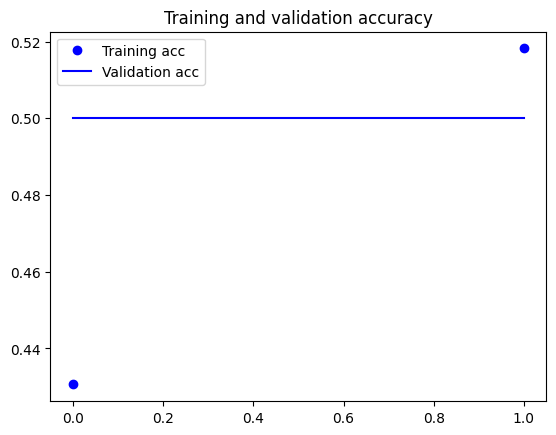

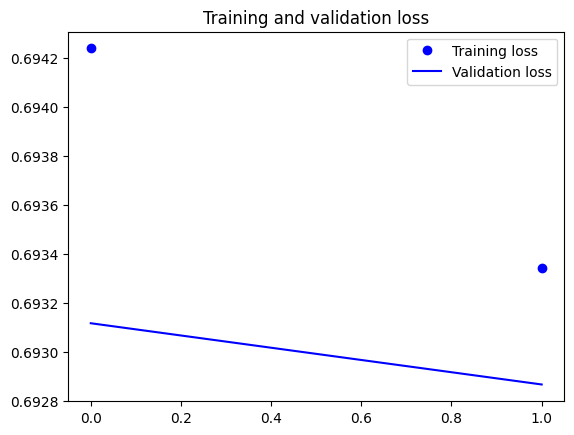

In [27]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
y_pred = model_2.predict(X_test)
y_pred = np.array([1 if prob > 0.5 else 0 for prob in y_pred])

20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step


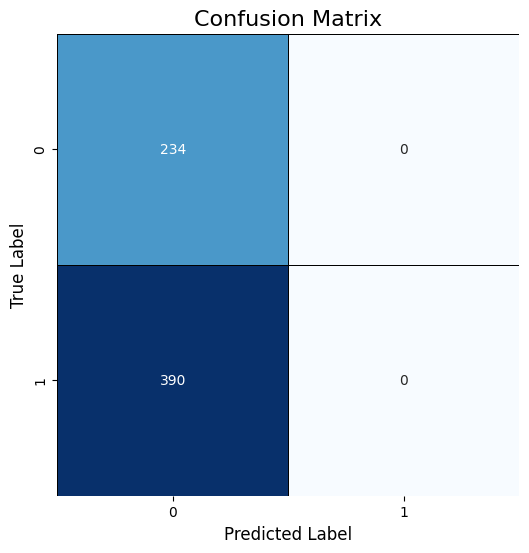

              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black', square=True)

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show();

print(classification_report(y_test, y_pred))

In [30]:
model_1.save('model_1.h5')

In [31]:
from keras.models import load_model
temp = load_model('model_1.h5')

In [32]:
temp.evaluate(X_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - acc: 0.6141 - loss: 0.6919


[0.6816416382789612, 0.625]